In [7]:
# Jupyter magic extensions that makes our live easier
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
os.chdir('..')

In [3]:
import os
print(os.getcwd())

c:\Users\rober\Documents\Epilepsy_Challenge\epilepsia_challenge


Calling data from patient 2002 ... 



c:\Users\rober\Documents\Epilepsy_Challenge\epilepsia_challenge\src\data\make_dataset.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels.drop(columns=["patient", "folder"], inplace=True)
c:\Users\rober\Documents\Epilepsy_Challenge\epilepsia_challenge\src\data\make_dataset.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels["sum_next_5_labels"] = 0
c:\Users\rober\Documents\Epilepsy_Challenge\epilepsia_challenge\src\data\make_dataset.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc


Training shape: 
(104, 22)

Val shape: 
(52,)


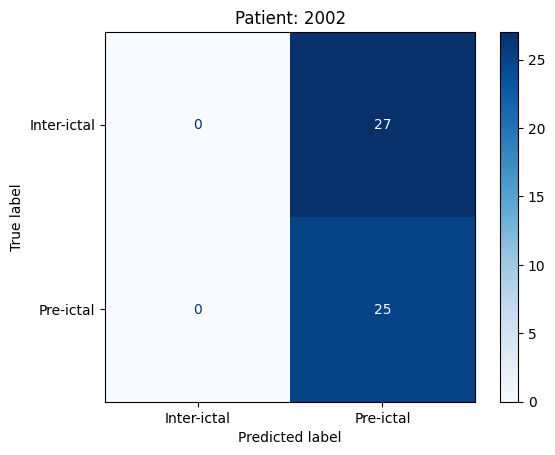

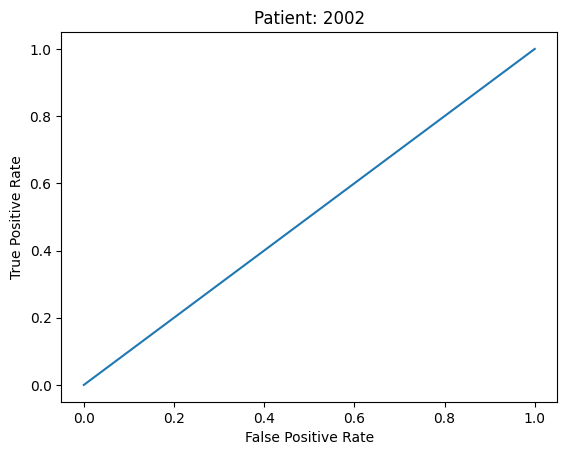

Resultado AUC:  {'2002': 0.5} 



c:\Users\rober\Documents\Epilepsy_Challenge\epilepsia_challenge\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rober\Documents\Epilepsy_Challenge\epilepsia_challenge\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rober\Documents\Epilepsy_Challenge\epilepsia_challenge\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [10]:
from src.models.train_pipeline import train_pipeline
from src.models.models import SklearnLogisticRegressionModel
from src.data.make_dataset import PandasDatasetLoader

patient_id = '2002'

dataset_path = 'E:\\Epilepsy challenge\\' + str(patient_id) + '_train\\data\\parquet\\train'

model , results = train_pipeline(PandasDatasetLoader(dataset_path),SklearnLogisticRegressionModel(), patient_id = patient_id, visualize=True, 
                                labels_prop = 1)

In [77]:
print(results['report'][patient_id])

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.31      1.00      0.47        24

    accuracy                           0.31        78
   macro avg       0.15      0.50      0.24        78
weighted avg       0.09      0.31      0.14        78



In [72]:
# Get base estimator from model
print(model.model.estimators_)

# Get feature importances
print(model.model.feature_importances_)

print(model.model.get_params())




[DecisionTreeClassifier(random_state=462541514)]
[0.         0.         0.14583333 0.         0.07142857 0.
 0.12857143 0.         0.25714286 0.13674242 0.         0.
 0.26028139 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': None, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(), 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}
